<a href="https://colab.research.google.com/github/Jai14/deep_learning/blob/main/deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import zipfile
import os

In [9]:
dataset_path = "/content/drive/MyDrive/Colab_Notebooks/FETAL_PLANES_ZENODO.zip"
extracted_dir = "/content/FETAL_PLANES_ZENODO"
os.makedirs(extracted_dir, exist_ok=True)

In [10]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print("Dataset has been extracted.")

Dataset has been extracted.


In [11]:
set_cur_dir = "/content/FETAL_PLANES_ZENODO"
os.chdir(set_cur_dir)

In [12]:
# Load the CSV file into a DataFrame
df = pd.read_excel("FETAL_PLANES_DB_data.xlsx")

# Check the unique values and their counts in the "Plane" column
class_counts = df['Plane'].value_counts()

# Display the result
print(class_counts)

Plane
Other              4213
Fetal brain        3092
Fetal thorax       1718
Maternal cervix    1626
Fetal femur        1040
Fetal abdomen       711
Name: count, dtype: int64


# Concat brain plane with plane

In [13]:
df['Plane'] = df.apply(lambda row: row['Plane'] + ' ' + row['Brain_plane'] if row['Plane'] == 'Fetal brain' else row['Plane'], axis=1)

In [14]:
# Check the unique values and their counts in the "Plane" column
class_counts = df['Plane'].value_counts()
total_count = len(df)

# Display the result
print(class_counts)
print("The length of the df" , total_count)

Plane
Other                            4213
Fetal thorax                     1718
Fetal brain Trans-thalamic       1638
Maternal cervix                  1626
Fetal femur                      1040
Fetal brain Trans-cerebellum      714
Fetal abdomen                     711
Fetal brain Trans-ventricular     597
Fetal brain Other                 143
Name: count, dtype: int64
The length of the df 12400


In [15]:
# Calculate the percentage for each class
percentages = (class_counts / total_count) * 100

# Display the result
print(percentages)

Plane
Other                            33.975806
Fetal thorax                     13.854839
Fetal brain Trans-thalamic       13.209677
Maternal cervix                  13.112903
Fetal femur                       8.387097
Fetal brain Trans-cerebellum      5.758065
Fetal abdomen                     5.733871
Fetal brain Trans-ventricular     4.814516
Fetal brain Other                 1.153226
Name: count, dtype: float64


In [51]:
from sklearn.utils import resample
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
import numpy as np
import matplotlib.pyplot as plt

In [17]:
randomly_selected_data = pd.DataFrame()
target_count = 143

In [18]:
for class_label in df['Plane'].unique():
    # Select only the rows corresponding to the current class
    class_data = df[df['Plane'] == class_label]

    # Randomly sample 143 images from the current class
    sampled_data = class_data.sample(n=target_count, random_state=42)

    # Concatenate the sampled data with the overall randomly selected dataset
    randomly_selected_data = pd.concat([randomly_selected_data, sampled_data])

# Shuffle the randomly selected data
randomly_selected_data = randomly_selected_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
randomly_selected_data

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00984_Plane3_6_of_8,984,Fetal brain Other,Other,Op. 2,Voluson E6,1
1,Patient01624_Plane2_1_of_1,1624,Fetal abdomen,Not A Brain,Other,Voluson E6,0
2,Patient01443_Plane6_1_of_1,1443,Fetal thorax,Not A Brain,Other,Voluson S10,0
3,Patient01623_Plane2_1_of_1,1623,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,0
4,Patient01198_Plane3_2_of_2,1198,Fetal brain Other,Other,Op. 3,Aloka,1
...,...,...,...,...,...,...,...
1282,Patient01718_Plane3_3_of_4,1718,Fetal brain Trans-ventricular,Trans-ventricular,Other,Voluson S10,0
1283,Patient01508_Plane3_2_of_2,1508,Fetal brain Trans-ventricular,Trans-ventricular,Other,Voluson S10,0
1284,Patient00832_Plane3_2_of_3,832,Fetal brain Trans-ventricular,Trans-ventricular,Op. 3,Aloka,1
1285,Patient00732_Plane6_2_of_7,732,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1


In [20]:
class_counts = randomly_selected_data['Plane'].value_counts()
total_count = len(randomly_selected_data)

# Display the result
print(class_counts)
print("The length of the df" , total_count)

Plane
Fetal brain Other                143
Fetal abdomen                    143
Fetal thorax                     143
Maternal cervix                  143
Fetal brain Trans-thalamic       143
Fetal brain Trans-cerebellum     143
Other                            143
Fetal brain Trans-ventricular    143
Fetal femur                      143
Name: count, dtype: int64
The length of the df 1287


In [21]:
# Calculate the percentage for each class
percentages = (class_counts / total_count) * 100

# Display the result
print(percentages)

Plane
Fetal brain Other                11.111111
Fetal abdomen                    11.111111
Fetal thorax                     11.111111
Maternal cervix                  11.111111
Fetal brain Trans-thalamic       11.111111
Fetal brain Trans-cerebellum     11.111111
Other                            11.111111
Fetal brain Trans-ventricular    11.111111
Fetal femur                      11.111111
Name: count, dtype: float64


In [22]:
X,Y = randomly_selected_data["Image_name"], randomly_selected_data["Plane"]

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform Y
Y_encoded = label_encoder.fit_transform(Y)

print("Original labels:", Y)
print("Encoded labels:", Y_encoded)

Original labels: 0                   Fetal brain Other
1                       Fetal abdomen
2                        Fetal thorax
3                       Fetal abdomen
4                   Fetal brain Other
                    ...              
1282    Fetal brain Trans-ventricular
1283    Fetal brain Trans-ventricular
1284    Fetal brain Trans-ventricular
1285                     Fetal thorax
1286    Fetal brain Trans-ventricular
Name: Plane, Length: 1287, dtype: object
Encoded labels: [1 0 6 ... 4 6 4]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

In [26]:
current_directory = os.getcwd()
print("Current working directory:",current_directory)

Current working directory: /content/FETAL_PLANES_ZENODO


In [27]:
class FetailImageDataset(Dataset):
    def __init__(self, X , Y, transform=None):
        self.image_name = X
        self.labels = Y
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = self.image_name.iloc[idx]
        img_path = os.path.join("Images/", img_name + ".png")

        # Open image
        img = Image.open(img_path)

        # Convert label to PyTorch tensor
        label = self.labels[idx]

        # Apply transforms if available
        if self.transform:
            img = self.transform(img)

        return img, label

In [28]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize image to a fixed size
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),           # Convert PIL image to tensor
])

In [29]:
train_Dataset = FetailImageDataset(X_train,y_train, transform=transform)
test_Dataset = FetailImageDataset(X_test,y_test, transform=transform)
val_Dataset = FetailImageDataset(X_val,y_val, transform=transform)

In [30]:
y_train[0]

8

In [31]:
from torch.utils.data import DataLoader

In [68]:
batch_size = 64

train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_Dataset, batch_size=batch_size, shuffle=False)

In [33]:
img ,label = train_Dataset[0]

In [34]:
img.shape

torch.Size([1, 100, 100])

In [35]:
label

8

In [36]:
img ,label = train_Dataset[30]

In [37]:
img.shape

torch.Size([1, 100, 100])

In [38]:
import torch
import torch.nn as nn

class fetalModel(torch.nn.Module):

    def __init__(self):
        super(fetalModel, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.activation = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1)

        # Define fully connected layers
        self.fc1 = nn.Linear(3*98*98,200)
        self.fc2 = nn.Linear(200, 9)  # Adjusted to have 9 output labels

    def forward(self, x):

        # Apply convolutional layers
        x = self.pool(self.activation(self.conv1(x)))

        # Flatten the output before passing to fully connected layer
        m = nn.Flatten()
        x = m(x)

        # Apply fully connected layers
        x = self.activation(self.fc1(x))
        x = self.fc2(x)

        return x

In [101]:
def train(model, train_loader, test_loader, criterion, optimizer, num_epochs):

    train_losses = []
    test_losses = []
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:

            inputs,labels = inputs.cuda(),labels.cuda()
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Print statistics
            running_loss += loss.item() * inputs.size(0)

        # Print epoch statistics
        epoch_loss = running_loss / len(labels)
        train_losses.append(epoch_loss)

        model.eval()  # Set model to evaluation mode

        correct = 0
        total = 0
        test_loss = 0.0

        with torch.no_grad():  # Disable gradient calculation for inference
            for inputs, labels in train_loader:
                # Forward pass
                inputs,labels = inputs.cuda(),labels.cuda()

                # Get predicted labels

                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, labels)
                test_loss += loss.item() * labels.size(0)

                # Total correct predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # Calculate average validation loss
                avg_loss = test_loss / len(labels)
                test_losses.append(avg_loss)

        # Calculate accuracy
        accuracy = (correct / total) * 100
        # Print epoch statistics
        print(f'Epoch [{epoch+1}/{num_epochs}],'
              f'Training Loss: {train_losses[-1]:.4f}, '
              f'Testing Loss: {test_losses[-1]:.4f}, '
              f'Accuracy on training set: {accuracy:.2f}%')


    # Plot learning curve
    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

    return train_losses,test_losses,accuracy

In [102]:
def eval(model, val_loader, criterion, optimizer):

  model.eval()  # Set model to evaluation mode

  with torch.no_grad():  # Disable gradient calculation for inference
      correct = 0
      total = 0
      for inputs, labels in val_loader:

          # Forward pass
          inputs,labels = inputs.cuda(),labels.cuda()

          outputs = model(inputs)

          # Get predicted labels
          _, predicted = torch.max(outputs, 1)


          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  # Calculate accuracy
  accuracy = (correct / total) * 100
  print(f"Accuracy on validation set:",(accuracy))

In [104]:
import torch.optim as optim

learning_rate = 0.0001
num_epochs = 1

# Initialize model
model = fetalModel().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/1],Training Loss: 470.4097, Testing Loss: 430.7858, Accuracy on training set: 37.33%


ValueError: x and y must have same first dimension, but have shapes (1,) and (15,)

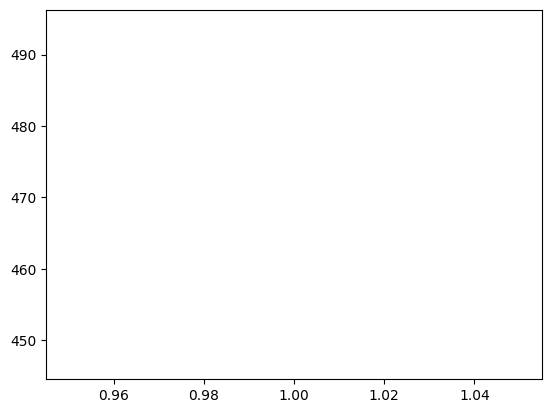

In [105]:
train_losses,test_losses,accuracy = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

In [86]:
len(train_losses)

NameError: name 'train_losses' is not defined

In [100]:
eval(model, val_loader, criterion, optimizer)

Accuracy on validation set: 51.29533678756477
